##Task Description

This chapter has is to mutate an image by injecting a randomly generated number into one of the red, green, or blue channels at every pixel. The time-based random number was scaled using the sign of its even or odd value. If it was an even number, an additional 10 were added so that it would match the conditions of the task.

To achieve this, I first loaded the image using **PIL** (Python Imaging Library) and converted it into a **NumPy** array for pixel manipulation. By using NumPy, I could efficiently apply the generated number to the pixel values in bulk. Specifically, the generated number was added to each of the red, green, and blue (RGB) values over all the pixels in the image.

The modified image was saved under a new name. Additionally, I computed the sum of all the red pixel values in the new image, which was important for proceeding to the further chapters of the challenge.



**Code Explanation:**

- **Generate a Number:**  
  I generate a number influenced by the parity of the current system time. If the value is even, I add 10 to ensure it becomes odd.

- **Loading the Image:**  
  Using **PIL**, I load the original image and convert its pixel data into a NumPy array using `numpy.asarray`, which makes it easy to manipulate the RGB channels.

- **Pixel Manipulation:**  
  The generated number is added to the red, green, and blue values of every pixel in the image. This distorts the image by altering its color values. Afterward, the pixel values are clipped to keep them within the valid (0-255) range.

- **Image After Processing:**  
  Once the pixel manipulation is complete, I save the modified image under a different name to avoid overwriting the original image.

- **Red Pixel Sum:**  
  I calculate the sum of the red pixel values after modification to meet the challenge requirements. This value is printed and used for the next part of the task.

- **Display Modified Image:**  
  Finally, the modified image is displayed in a Colab notebook to verify that the changes were applied correctly.


This process ensured that we could edit the image efficiently while adhering to the task's constraints. Using **NumPy** helped optimize and speed up the pixel manipulation, ensuring a performant outcome.

In [3]:
# Installing and importing all the required libraries
!pip install pillow
import time
from PIL import Image
import numpy as np

In [1]:
from google.colab import drive
import os

# Lets start with mounting the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image_path = '/content/drive/MyDrive/chapter1.jpg'
image = Image.open(image_path)
image_array = np.array(image)


In [5]:
# Generating the number based on the current time
current_time = int(time.time())
generated_number = (current_time % 100) + 50

if generated_number % 2 == 0:
    generated_number += 10

print(f"Generated number: {generated_number}")


Generated number: 91


In [6]:
# Modifing the pixels by adding the generated number to each (r, g, b) value
modified_image_array = image_array.copy()
modified_image_array[:, :, 0] = np.clip(modified_image_array[:, :, 0] + generated_number, 0, 255)  # Modify red channel
modified_image_array[:, :, 1] = np.clip(modified_image_array[:, :, 1] + generated_number, 0, 255)  # Modify green channel
modified_image_array[:, :, 2] = np.clip(modified_image_array[:, :, 2] + generated_number, 0, 255)  # Modify blue channel


In [7]:
# Creating a new image from the modified array and saving it
modified_image = Image.fromarray(modified_image_array)
modified_image.save('/content/drive/MyDrive/chapter1out.png')  # Save the modified image
print("Modified image saved as 'chapter1out.png'")


Modified image saved as 'chapter1out.png'


In [8]:
# Calculating the sum of red pixel values in the new image
red_sum = np.sum(modified_image_array[:, :, 0])
print(f"Sum of red pixel values: {red_sum}")


Sum of red pixel values: 147540567


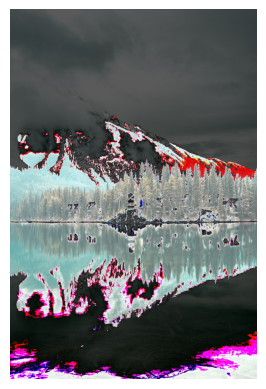

In [10]:
# Displaying the modified image in the Colab notebook
import matplotlib.pyplot as plt

# Loading the saved modified image
modified_image_path = '/content/drive/MyDrive/chapter1out.png'
modified_image = Image.open(modified_image_path)

# Displaying the image
plt.imshow(modified_image)
plt.axis('off')  # Hide axes
plt.show()
